<a href="https://colab.research.google.com/github/Ajkr27/HeartHack-ML/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Heart Disease Prediction By AJAY KUMAR

**# Importing essential libraries**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['.config', 'heart.csv', 'sample_data']


In [80]:
dataset = pd.read_csv('/content/heart.csv')


Verifying it as a 'dataframe' object in **pandas**

In [81]:
type(dataset)

pandas.core.frame.DataFrame

Shape of **dataset**

In [82]:
dataset.shape

(303, 14)

Printing out a few **columns**

In [83]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


**description**

In [85]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###Luckily, we have no missing **values**

Let's understand our columns better:**bold text**

In [87]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the 'target' **variable**

In [88]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [89]:
dataset["target"].unique()

array([1, 0])

Clearly, this is a classification problem, with the target variable having values '0' and '1'**bold text**

Checking correlation between *columns*

In [90]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.**bold text**

Exploratory Data Analysis (EDA)

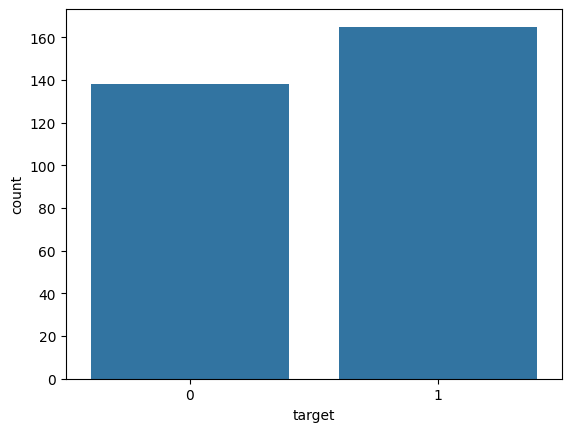

target
1    165
0    138
Name: count, dtype: int64


In [91]:
#First, analysing the target variable:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot visualization
sns.countplot(x="target", data=dataset)
plt.show()

# Value counts
target_temp = dataset["target"].value_counts()
print(target_temp)


In [92]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
Analysing the 'Sex' **feature**

In [93]:
dataset["sex"].unique()

array([1, 0])

We notice, that as expected, the 'sex' feature has 2 unique **features**

<Axes: xlabel='sex', ylabel='target'>

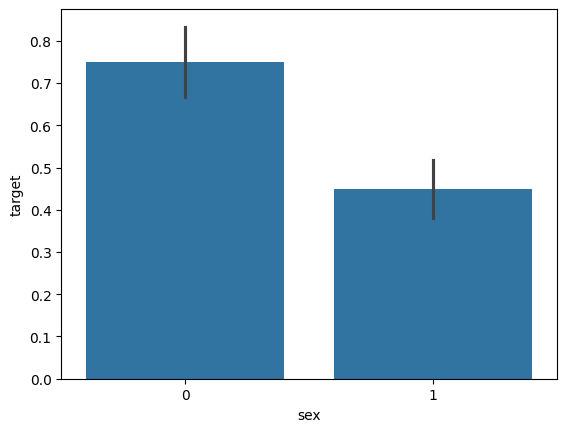

In [94]:
sns.barplot(x="sex", y="target", data=dataset, estimator=lambda x: sum(x)/len(x))  # For average


We notice, that females are more likely to have heart problems than **males**

In [95]:
##Analysing the 'Chest Pain Type' feature
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

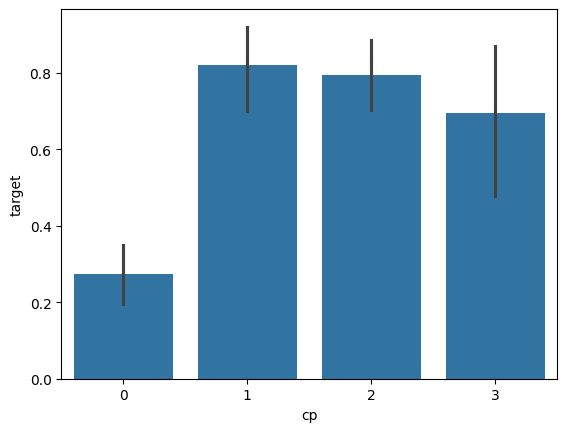

In [96]:
#As expected, the CP feature has values from 0 to 3
sns.barplot(x="cp", y="target", data=dataset)



In [97]:
#We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems
# Analysing the FBS feature
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [98]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

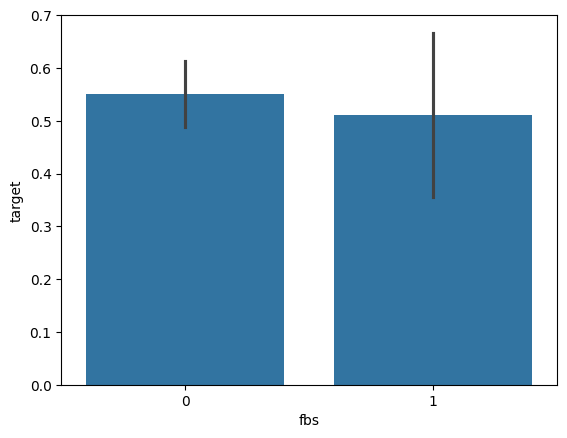

In [99]:
sns.barplot(x="fbs", y="target", data=dataset)


Nothing extraordinary here

In [100]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

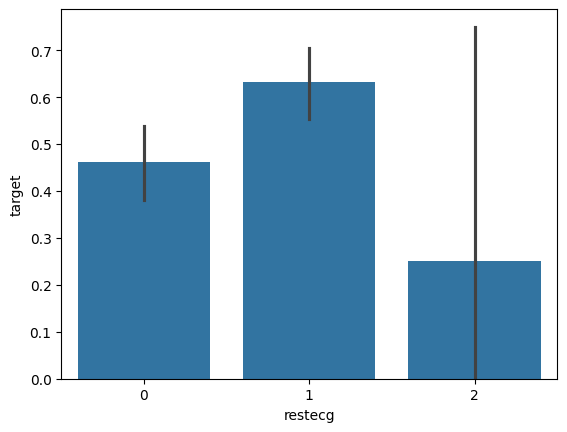

In [101]:
sns.barplot(x="restecg", y="target", data=dataset)


We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**bold text**

# Analysing the 'exang' feature

In [102]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

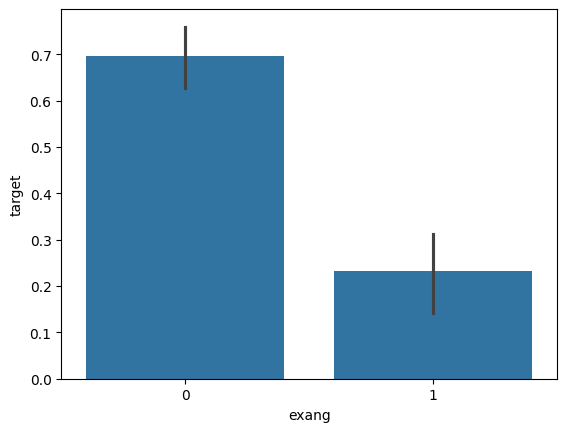

In [103]:
sns.barplot(x="exang", y="target", data=dataset)


People with exang=1 i.e. Exercise induced angina are much less likely to have heart **problems**

In [104]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

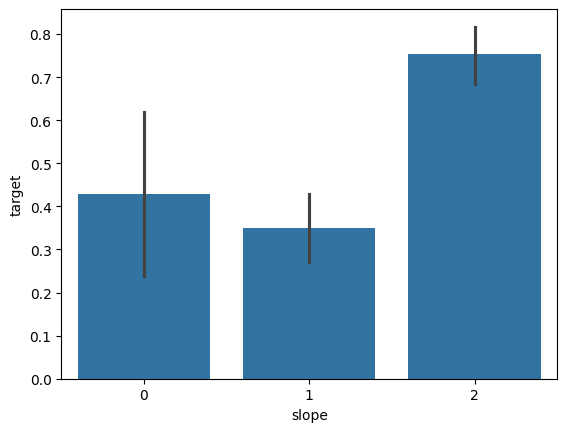

In [105]:
sns.barplot(x="slope", y="target", data=dataset)


We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'**bold text**

In [106]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

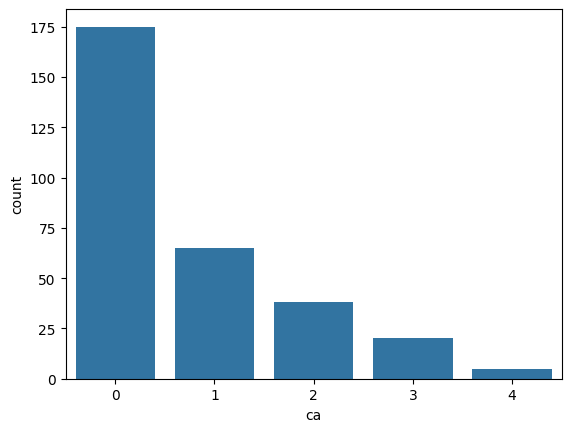

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values (if any)
dataset["ca"] = dataset["ca"].fillna(0)

# Convert to categorical if needed
dataset["ca"] = dataset["ca"].astype('category')

# Plot
sns.countplot(x="ca", data=dataset)
plt.show()



pie **chart**

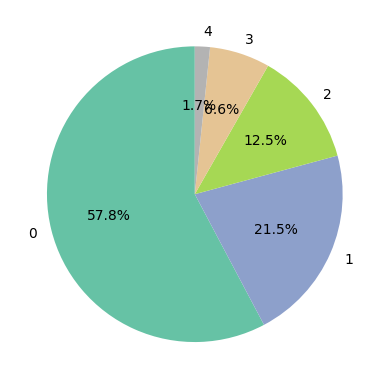

In [108]:
dataset["ca"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set2")
plt.ylabel("")  # Remove y-label
plt.show()

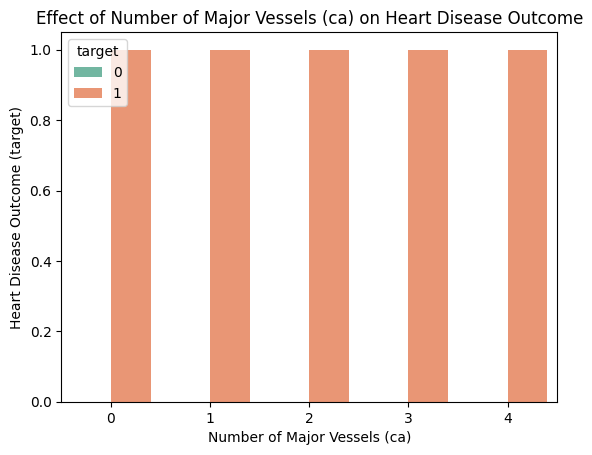

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot to visualize the relationship between 'ca' and 'target' with a colorful palette
sns.barplot(x="ca", y="target", data=dataset, hue="target", palette="Set2")

# Customization
plt.title('Effect of Number of Major Vessels (ca) on Heart Disease Outcome')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Heart Disease Outcome (target)')
plt.show()



<Axes: xlabel='ca', ylabel='target'>

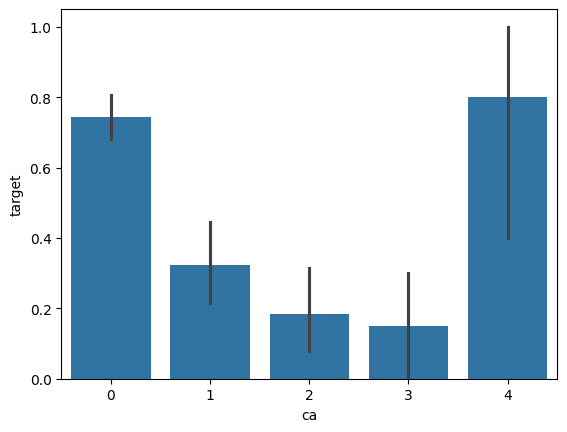

In [110]:
sns.barplot(x="ca", y="target", data=dataset)


ca=4 has astonishingly large number of heart **patients**

In [111]:
##### Analysing the 'thal' feature

In [112]:
dataset["thal"].unique()

array([1, 2, 3, 0])

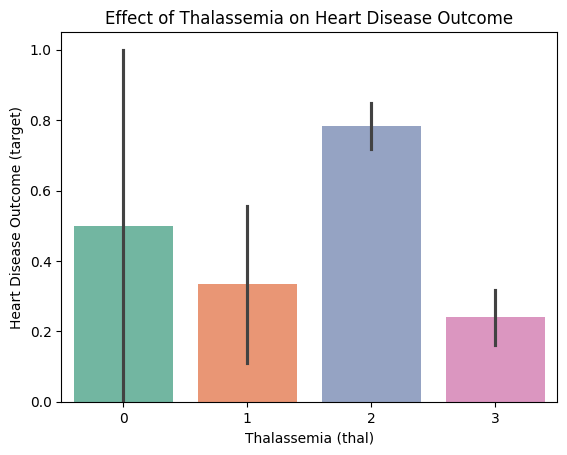

In [113]:
sns.barplot(x="thal", y="target", data=dataset, palette="Set2")

# Customization
plt.title('Effect of Thalassemia on Heart Disease Outcome')
plt.xlabel('Thalassemia (thal)')
plt.ylabel('Heart Disease Outcome (target)')
plt.show()

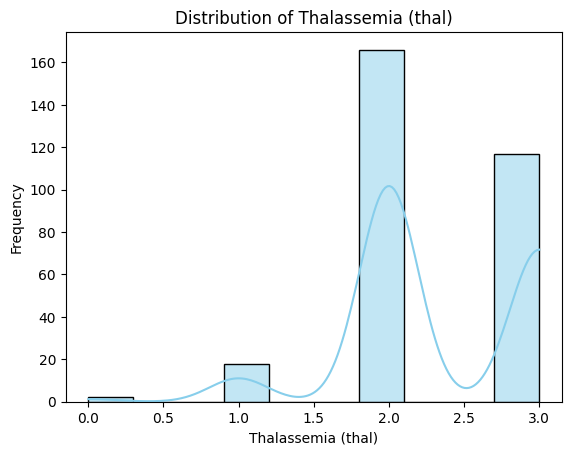

In [114]:
sns.histplot(dataset["thal"], kde=True, color="skyblue", bins=10)
plt.title('Distribution of Thalassemia (thal)')
plt.xlabel('Thalassemia (thal)')
plt.ylabel('Frequency')
plt.show()


IV. Train Test **split**

In [115]:
from sklearn.model_selection import train_test_split

# Features and target variable
predictors = dataset.drop("target", axis=1)  # Features (input variables)
target = dataset["target"]  # Target variable (output variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Print the shape of the datasets to verify the split
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (242, 13)
Testing data shape: (61, 13)


In [116]:
X_train.shape

(242, 13)

In [117]:
X_test.shape

(61, 13)

In [118]:
Y_train.shape

(242,)

In [119]:
Y_test.shape

(61,)

V. Model **Fitting**

In [120]:
from sklearn.metrics import accuracy_score

Logistic **Regression**

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, Y_train)

# Predict on test data
Y_pred_lr = lr.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(Y_test, Y_pred_lr)
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
class_report = classification_report(Y_test, Y_pred_lr)

# Display the evaluation results
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 85.25%
Confusion Matrix:
[[22  5]
 [ 4 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [122]:
Y_pred_lr.shape

(61,)

In [50]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


Naive **Bayes**

In [123]:
from sklearn.naive_bayes import GaussianNB

# Step 1: Create the model
nb = GaussianNB()

# Step 2: Train the model
nb.fit(X_train, Y_train)

# Step 3: Predict on test data
Y_pred_nb = nb.predict(X_test)



In [125]:
Y_pred_nb.shape

(61,)

In [124]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


**SVM**

In [126]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [127]:
Y_pred_svm.shape

(61,)

In [128]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


K Nearest **Neighbors**

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [130]:
Y_pred_knn.shape

(61,)

In [131]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


Decision **Tree**

In [132]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [133]:
print(Y_pred_dt.shape)

(61,)


In [134]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


RANDOM FOREST



In [135]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [138]:
Y_pred_rf.shape

(61,)

In [137]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


**XGBoost**

In [151]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example dataset load (replace with your dataset)
# dataset = pd.read_csv('your_dataset.csv')

# Encode categorical columns (if applicable)
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'ca']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Ensure all columns are numeric now
print(dataset.dtypes)

# Fill missing values if there are any (optional)
dataset.fillna(dataset.mean(), inplace=True)

# Split data into predictors and target
X = dataset.drop("target", axis=1)  # predictors (features)
Y = dataset["target"]  # target (labels)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Fit the model
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_pred_xgb = xgb_model.predict(X_test)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [152]:
Y_pred_xgb.shape

(61,)

In [153]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 81.97 %


Neural **Network**

In [154]:
from keras.models import Sequential
from keras.layers import Dense

In [155]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [156]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5647 - loss: 14.7712
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5275 - loss: 12.8670 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4907 - loss: 8.3200 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4376 - loss: 4.7212 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3706 - loss: 4.8790 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3625 - loss: 4.7243 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4163 - loss: 4.1791 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3850 - loss: 4.0370  
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4003 - loss: 3.7767 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4301 - loss: 3.6149  
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4792 - loss: 2.9285  
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4837 

In [157]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [158]:
Y_pred_nn.shape

(61, 1)

In [159]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [160]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 83.61 %


VI. Output final **score**

In [161]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 81.97 %
The accuracy score achieved using Neural Network is: 83.61 %


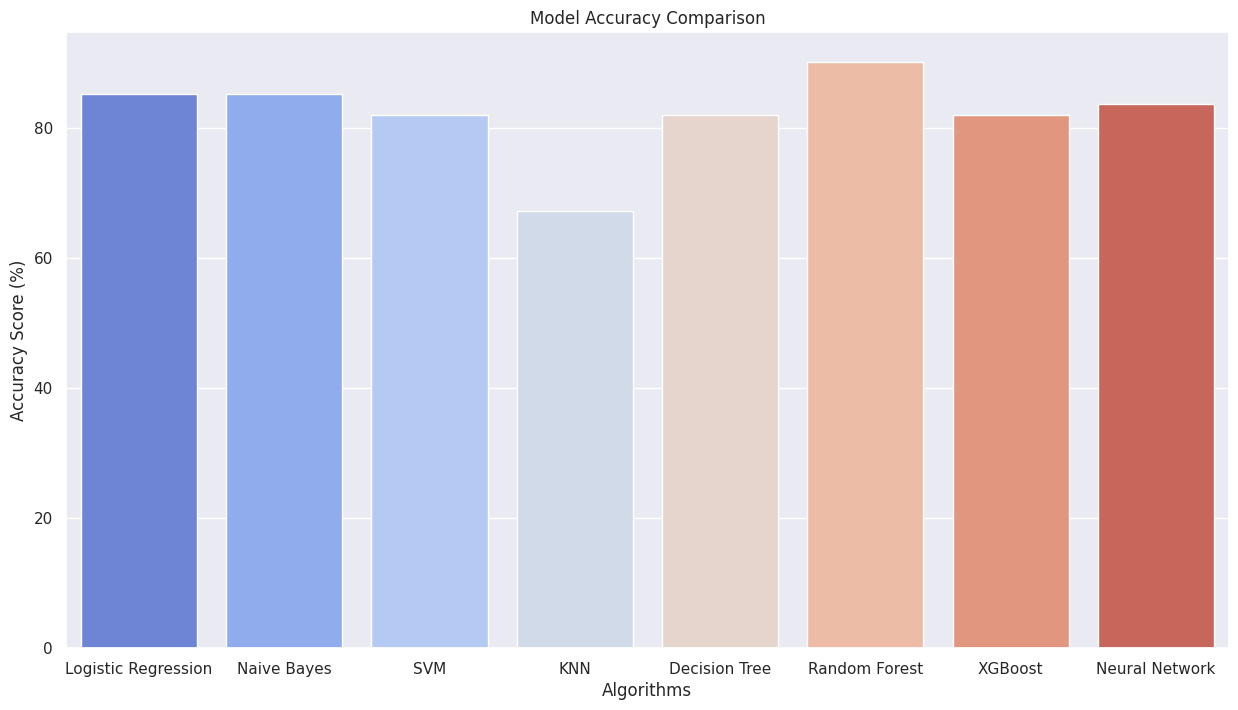

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN',
              'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 90.16, 81.97, 83.61]

# Set figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set labels
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Model Accuracy Comparison")

# Barplot
sns.barplot(x=algorithms, y=scores, palette="coolwarm")

# Show plot
plt.show()


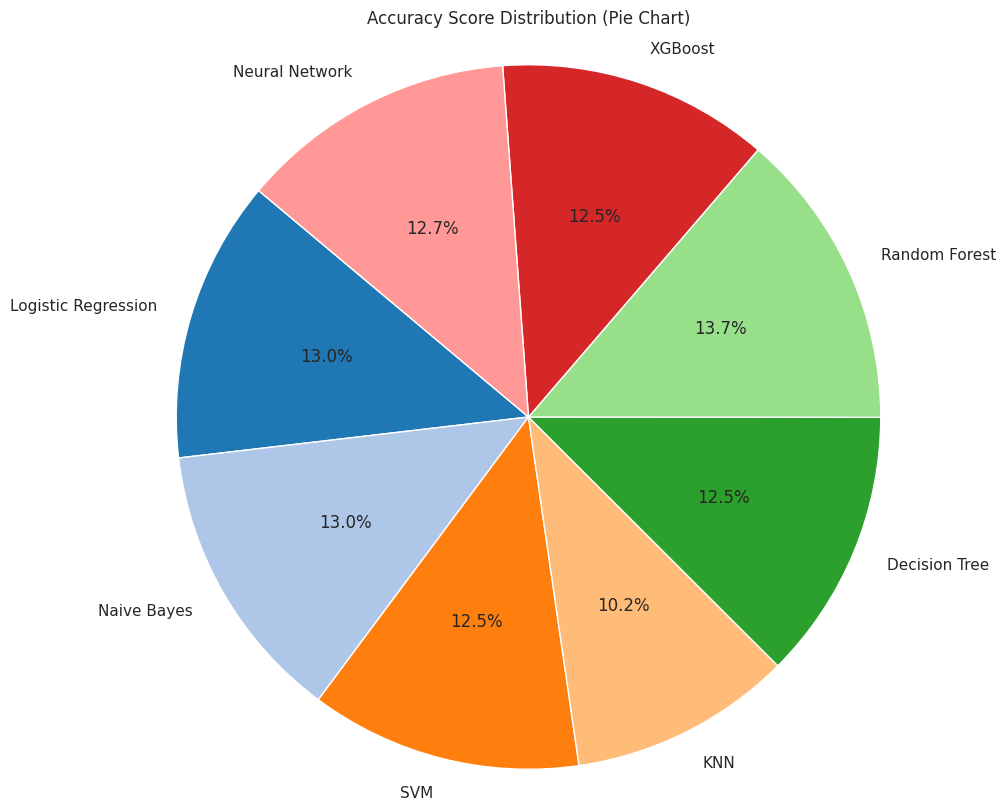

In [164]:
import matplotlib.pyplot as plt

# Data
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN',
              'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 90.16, 81.97, 83.61]

# Pie plot
plt.figure(figsize=(10, 10))
plt.pie(scores, labels=algorithms, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Accuracy Score Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


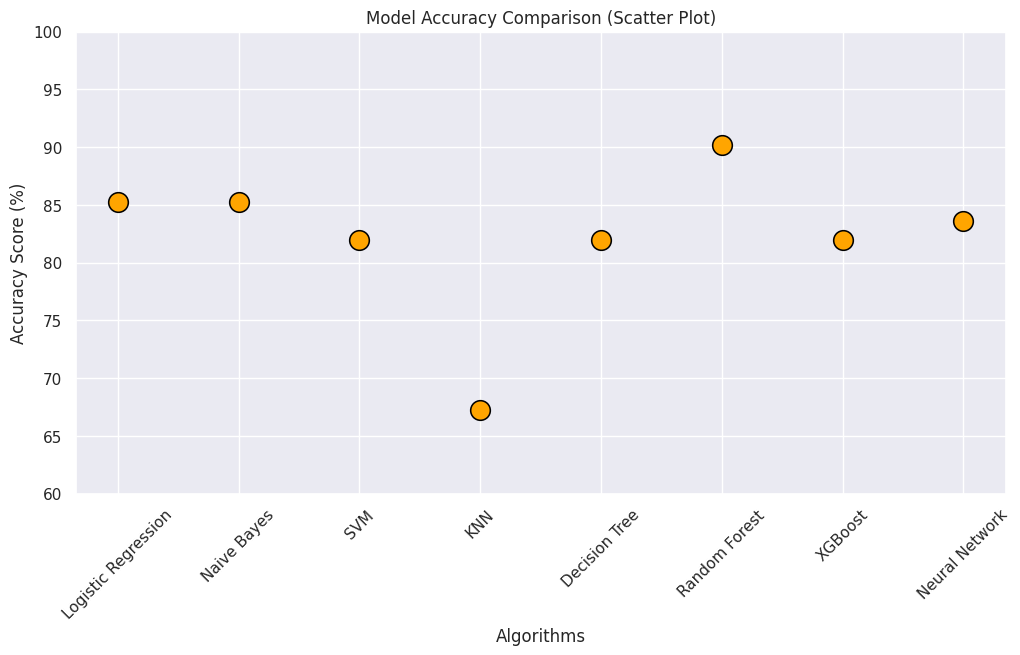

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=algorithms, y=scores, s=200, color='orange', edgecolor='black')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Model Accuracy Comparison (Scatter Plot)")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(60, 100)
plt.show()


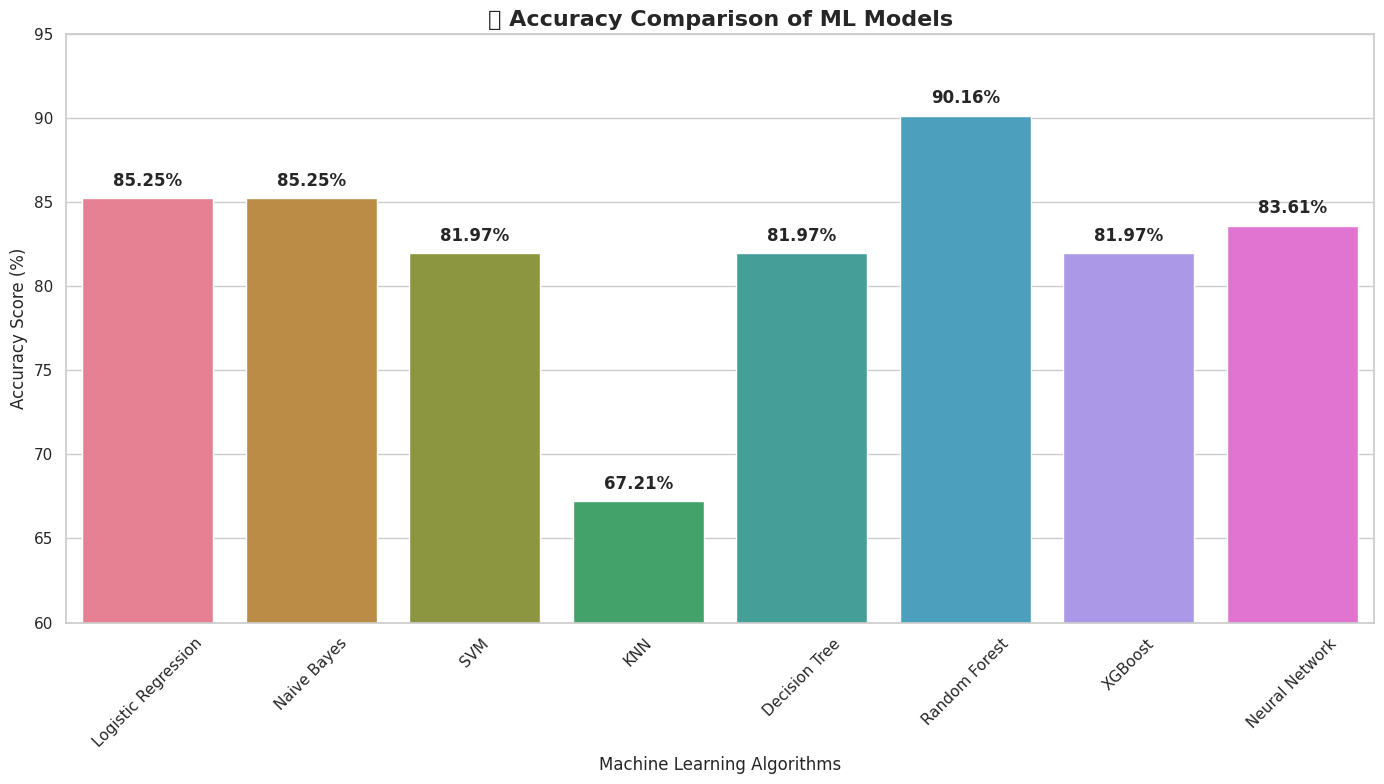

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN',
              'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 90.16, 81.97, 83.61]

# Plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

colors = sns.color_palette("husl", len(algorithms))
bars = sns.barplot(x=algorithms, y=scores, palette=colors)

# Adding text labels on bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2.0,
             bar.get_height() + 0.5,
             f'{bar.get_height()}%',
             ha='center', va='bottom',
             fontsize=12, fontweight='bold')

# Titles and labels
plt.title("🔍 Accuracy Comparison of ML Models", fontsize=16, fontweight='bold')
plt.xlabel("Machine Learning Algorithms", fontsize=12)
plt.ylabel("Accuracy Score (%)", fontsize=12)
plt.ylim(60, 95)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()
